## Playing with sentence embeddings 

The embbedings are clearly of different qualities. The default, Ada, is actuially pretty bad 
and shows hige picks for some elements rtegardless of the sentence. This influences the 
sentence distance. The text-embedding-3-xx produce a much more obvious differentiation and 
the xx = small works very well event for 256 dimensions 

In [ ]:
import os
import openai
import sys, numpy as np 
sys.path.append('../..')
from langchain.vectorstores import Chroma

#from dotenv import load_dotenv, find_dotenv
#_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  =  os.environ['OPENAI_API_KEY']
show = lambda obj: print( [i for i in dir(obj) if not i.startswith('_')] ) 



In [ ]:
#from langchain.embeddings.openai import OpenAIEmbeddings

from langchain.embeddings import OpenAIEmbeddings
import numpy as np 

sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "whats the weather like in The England?" #"the weather is ugly outside. it is raining, cold and windy"

dimension = 256
openai_embbeding_model_large    = 'text-embedding-3-large' 
openai_embbeding_model_small    = 'text-embedding-3-small' 
openai_embbeding_model_default  = 'text-embedding-ada-002' 

embedding = OpenAIEmbeddings( model = openai_embbeding_model_small,
                             model_kwargs= {'dimensions' : dimension}
                             )
embedding_model = embedding
sentence1_emb  = embedding.embed_query(sentence1)
sentence2_emb  = embedding.embed_query(sentence2)
sentence3_emb  = embedding.embed_query(sentence3)


In [1]:

sentence1_emb[0:10]
sentence2_emb[0:10]
sentence3_emb[0:10]

# sentence embbedings is not the dot product of the individual word embeddings.
# otherwise two sentences with the same words would be the same regardless of the order of the words
# transfomers take the -context-aware- of each word and then average all the word in one vector
# this is actually the result of training the NN with similar sentences (or question-answer pairs), etc...
print('---similarity---')
similarity = [] 
for x in [sentence1_emb,sentence2_emb,sentence3_emb]:
    sim = [ np.dot(sentence1_emb, x),np.dot(sentence2_emb, x),np.dot(sentence3_emb, x)]
    print( sim )
    similarity.append(sim)


import plotly.express as px

fig = px.imshow(similarity)
fig.show()


NameError: name 'sentence1_emb' is not defined

In [99]:
in_1 = "Missing flamingo discovered at swimming pool"
in_2 = "Sea otter spotted on surfboard by beach"
in_3 = "Baby panda enjoys boat ride"
in_4 = "Breakfast themed food truck beloved by all!"
in_5 = "New curry restaurant aims to please!"
in_6 = "Python developers are wonderful people"
in_7 = "TypeScript, C++ or Java? All are great!" 
in_8 = "Planel Plutto is very small. It is a dwarf planet." 

input_text_lst_news = [in_1, in_2, in_3, in_4, in_5, in_6, in_7,in_8]

embeddings = embedding.embed_documents(input_text_lst_news)
 
      
embeddings_array = np.array(embeddings) 
print("Shape: " + str(embeddings_array.shape))
print(embeddings_array)


Shape: (8, 256)
[[ 0.01581429 -0.0242281   0.02955583 ... -0.00237022 -0.00086029
  -0.02217071]
 [ 0.07111177  0.00881817 -0.01795817 ...  0.03208011 -0.03303273
   0.02798642]
 [ 0.07778556 -0.07021929  0.03745029 ... -0.02865927 -0.03742307
  -0.03415706]
 ...
 [ 0.00064378 -0.07058794 -0.00739767 ... -0.01381068 -0.09473105
  -0.0213682 ]
 [-0.07632933  0.00415913 -0.04993507 ... -0.00541069  0.01426716
  -0.01477671]
 [-0.05077116 -0.01894195 -0.01545435 ...  0.09391887 -0.06674411
   0.02079595]]


In [100]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#import mplcursors
#%matplotlib ipympl

# Perform PCA for 2D visualization
PCA_model = PCA(n_components = 2)
PCA_model.fit(embeddings_array)
new_values = PCA_model.transform(embeddings_array)

new_values
import plotly.express as px
fig = px.scatter(x=new_values[:,0], y= new_values[:,1], text=input_text_lst_news)
fig.update_traces(textposition="bottom right")
fig.show()



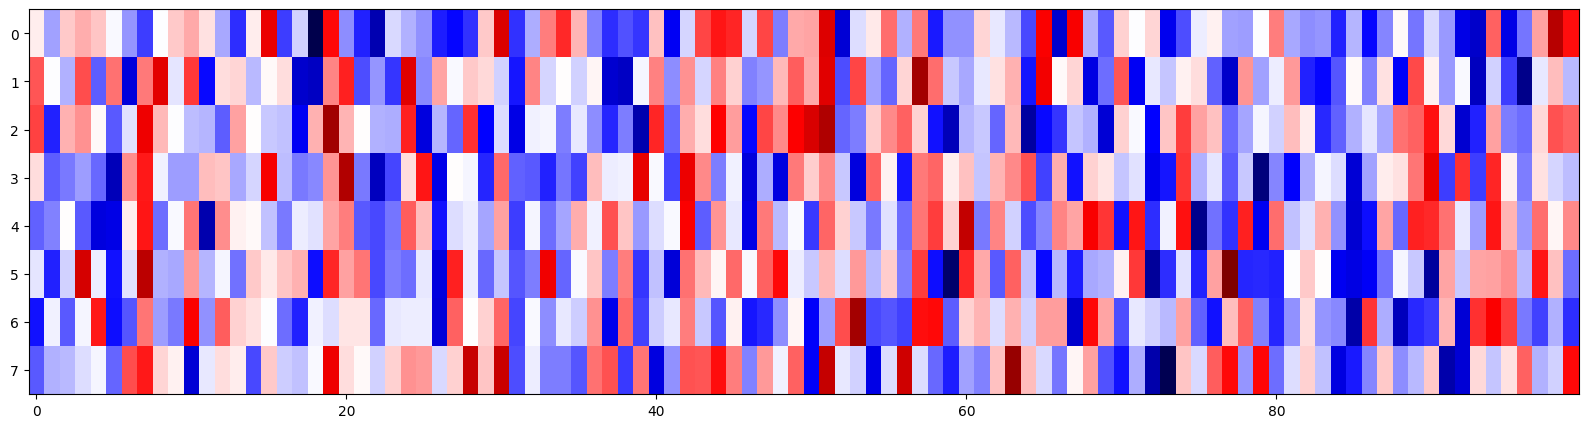

In [101]:
data = embeddings_array[:, 0:100] - 0.5 
plt.figure(figsize=(20, 5))
plt.imshow(data, cmap='seismic',  aspect='auto')


In [102]:
 
import plotly.graph_objects as go
fig = go.Figure()
x_values = list(range(embeddings_array[0,:].shape[0]))
# Add traces for each embedding

for n in range( len(embeddings_array) ):
    fig.add_trace(go.Scatter(x=x_values, y=embeddings_array[n, :], mode='lines+markers', name=f'Embedding {n+1}'))
 
 
fig.update_layout(
    title="Embeddings Plot",
    xaxis_title="Index",
    yaxis_title="Value",
    width=1000,  # Equivalent to figsize=(20, 5)
    height=400,
    legend_title="Embeddings",
)

# Show the plot
fig.show()

#whats going on with those spikes in the ada model? 


## Lets see some applications 

In [77]:
from langchain.embeddings.openai import OpenAIEmbeddings

dimension = 256 
embedding = OpenAIEmbeddings( model = openai_embbeding_model_small, model_kwargs= {'dimensions' : dimension} )

 
weather_uk = 'The climate in the United Kingdom is defined as a humid temperate oceanic climate, \
or Cfb on the Köppen climate classification system, a classification it shares with most of \
north-west Europe.\
Regional climates are influenced by the Atlantic Ocean and latitude. Northern Ireland, \
Wales and western parts of England and Scotland, being closest to the Atlantic Ocean,\
are generally the mildest, wettest, and windiest regions of the UK, and temperature ranges \
there are seldom extreme. Eastern areas are drier, cooler, and less windy, and also \
experience the greatest daily and seasonal temperature variations. Northern areas are generally \
cooler and wetter and have slightly larger temperature ranges than southern areas, which are \
generally warmer and drier.'.replace("  "," ")
        
weather_forecast = 'A few showers lingering in the east, with further rain into North. \
Elsewhere, mainly dry and cloudy. Breezy along coasts. Rather cold, but again milder \
in the southwest.'.replace("  "," ")
      
      
bicycle = 'A bicycle, also called a pedal cycle, bike, push-bike or cycle, is a human-powered or motor-assisted, \
pedal-driven, single-track vehicle, with two wheels attached to a frame, one behind the other. A bicycle \
rider is called a cyclist, or bicyclist. Bicycles were introduced in the 19th century in Europe. By \
the early 21st century there were more than 1 billion bicycles.[1][2] There are many more bicycles \
than cars.[3][4][5] Bicycles are the principal means of transport in many regions. They also provide \
a popular form of recreation, and have been adapted for use as childrens toys. Bicycles are used for \
fitness, military and police applications, courier services, bicycle racing, and artistic cycling. \
The basic shape and configuration of a typical upright or safety bicycle, has changed little since \
the first chain-driven model was developed around 1885.[6][7][8] However, many details have been improved, \
especially since the advent of modern materials and computer-aided design. These have allowed for a \
proliferation of specialized designs for many types of cycling. In the 21st century, electric bicycles \
have become popular.'.replace("  "," ") 
 
sentence1_emb  = embedding.embed_query(weather_uk)
sentence2_emb  = embedding.embed_query(weather_forecast)
sentence3_emb  = embedding.embed_query(bicycle)
 
 
print('---')
stack = [] 
for x in [sentence1_emb,sentence2_emb,sentence3_emb]:
    result = [np.dot(sentence1_emb, x),np.dot(sentence2_emb, x),np.dot(sentence3_emb, x)]
    print( result )
    stack.append(result)
    
fig = px.imshow(stack)
fig.show()


---
[1.0000000000000002, 0.44546818347262274, 0.05563928118430275]
[0.44546818347262274, 1.0, 0.011754053646187156]
[0.05563928118430275, 0.011754053646187156, 1.0]


In [88]:
#lets split weather uk into multiple chunks and see if we can get a better match
# Split

import pandas as pd 
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain_openai  import OpenAI

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 250,
    chunk_overlap = 55
)
splits1 = text_splitter.split_text(weather_uk)


#similarity of splits of weather_uk and all the other sentences 
for split in splits1: 
    x =  embedding.embed_query(split)
    
    print('split of weather_uk')
    print(split)
    df = pd.DataFrame(  
        {
            'weather_uk': [np.dot(sentence1_emb, x)],
            'weather_forecast': [np.dot(sentence2_emb, x)],
            'bicycle': [np.dot(sentence3_emb, x)]
        }
    )
    display(df)



split of weather_uk
The climate in the United Kingdom is defined as a humid temperate oceanic climate, or Cfb on the Köppen climate classification system, a classification it shares with most of north-west Europe.Regional climates are influenced by the Atlantic Ocean


,weather_uk,weather_forecast,bicycle
0,0.921857,0.396558,0.046693


split of weather_uk
climates are influenced by the Atlantic Ocean and latitude. Northern Ireland, Wales and western parts of England and Scotland, being closest to the Atlantic Ocean,are generally the mildest, wettest, and windiest regions of the UK, and temperature


,weather_uk,weather_forecast,bicycle
0,0.819675,0.424899,-0.0454


split of weather_uk
and windiest regions of the UK, and temperature ranges there are seldom extreme. Eastern areas are drier, cooler, and less windy, and also experience the greatest daily and seasonal temperature variations. Northern areas are generally cooler and


,weather_uk,weather_forecast,bicycle
0,0.666773,0.514807,-0.056439


split of weather_uk
variations. Northern areas are generally cooler and wetter and have slightly larger temperature ranges than southern areas, which are generally warmer and drier.


,weather_uk,weather_forecast,bicycle
0,0.478832,0.461682,-0.009334


In [91]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 250,
    chunk_overlap = 25
)
splits2 = text_splitter.split_text(bicycle)

for split in splits2: 
    x =  embedding.embed_query(split)
    print('split of bicycle')
    print(split)
    df = pd.DataFrame(  
        {
            'weather_uk': [np.dot(sentence1_emb, x)],
            'weather_forecast': [np.dot(sentence2_emb, x)],
            'bicycle': [np.dot(sentence3_emb, x)]
        }
    )
    display(df)

split of bicycle
A bicycle, also called a pedal cycle, bike, push-bike or cycle, is a human-powered or motor-assisted, pedal-driven, single-track vehicle, with two wheels attached to a frame, one behind the other. A bicycle rider is called a cyclist, or bicyclist.


,weather_uk,weather_forecast,bicycle
0,-0.004982,-0.017202,0.85212


split of bicycle
a cyclist, or bicyclist. Bicycles were introduced in the 19th century in Europe. By the early 21st century there were more than 1 billion bicycles.[1][2] There are many more bicycles than cars.[3][4][5] Bicycles are the principal means of transport


,weather_uk,weather_forecast,bicycle
0,0.091894,0.122547,0.75739


split of bicycle
means of transport in many regions. They also provide a popular form of recreation, and have been adapted for use as childrens toys. Bicycles are used for fitness, military and police applications, courier services, bicycle racing, and artistic


,weather_uk,weather_forecast,bicycle
0,0.077969,0.120366,0.640968


split of bicycle
racing, and artistic cycling. The basic shape and configuration of a typical upright or safety bicycle, has changed little since the first chain-driven model was developed around 1885.[6][7][8] However, many details have been improved, especially


,weather_uk,weather_forecast,bicycle
0,0.035578,0.001088,0.619183


split of bicycle
improved, especially since the advent of modern materials and computer-aided design. These have allowed for a proliferation of specialized designs for many types of cycling. In the 21st century, electric bicycles have become popular.


,weather_uk,weather_forecast,bicycle
0,0.031095,0.08518,0.621283


In [82]:
!rm -rf /tmp/chroma.db

In [89]:

persist_directory = 'docs/chroma/'

splits1 = text_splitter.split_text(weather_uk)
#splits2 = text_splitter.split_text(vilma)
#splits3 = text_splitter.split_text(weather_forecast)
#splits4 = text_splitter.split_text(bicycle)
splits = splits1 #+ splits2 + splits3 + splits4  


vectordb = Chroma.from_texts(
    texts = splits,
    collection_name='weather_and_bicycle',
    embedding=embedding,
    persist_directory=persist_directory
)
 
 

In [ ]:
def pretty_print_docs(docs):
    print()
    print(100*'*')
    if isinstance(docs[0],tuple):
        print(f"\n{'-' * 100}\n".join([f"Document {i+1}:\n\n" + d[0].page_content for i, d in enumerate(docs)]))
   
    else:
        print(f"\n{'-' * 100}\n".join([f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]))



#s = 'what are other names given to byclicles?'
s = 'whats the origin of byclicles?'
s = 'What are the main contributors to regional climate variability in The UK?'

print('basic similarity search')
docs_simple = vectordb.similarity_search_with_score(s,k=3) 
pretty_print_docs(docs_simple)
print(20*'-')

print('max marginal relevance search')
docs_mmr = vectordb.max_marginal_relevance_search(s,k=3, fetch_k = 5 )
pretty_print_docs(docs_mmr)
print(20*'-')


# Wrap our vectorstore
print('llm compressor')
llm = OpenAI(temperature=0, model="gpt-3.5-turbo-instruct")
compressor = LLMChainExtractor.from_llm(llm)

compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vectordb.as_retriever( search_type= 'mmr') 
)
docs_compressed = compression_retriever.invoke(s)
pretty_print_docs(docs_compressed)

basic similarity search

****************************************************************************************************
Document 1:

are generally the mildest, wettest, and windiest regions of the UK, and temperature ranges         there are seldom extreme. Eastern areas are drier, cooler, and less windy, and also         experience the greatest daily and seasonal temperature variations. Northern areas are generally         cooler and wetter and have slightly larger temperature ranges than southern areas, which are         generally warmer and drier.
----------------------------------------------------------------------------------------------------
Document 2:

are generally the mildest, wettest, and windiest regions of the UK, and temperature ranges         there are seldom extreme. Eastern areas are drier, cooler, and less windy, and also         experience the greatest daily and seasonal temperature variations. Northern areas are generally         cooler and wetter and have s

756

In [94]:
#how would an llm respond to th query, when using any of these document splits? 

def docs_to_memory(docs):
    if isinstance(docs[0],tuple):
        lines = [d[0].page_content for d in docs]
    else:
        lines = [d.page_content for d in docs]

    return '\n'.join(lines)
 
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from string import Template

template = """GENERAL INSTRUCTIONS
You are a domain expert. Your task is to answer questions based only in the information provided as -MEMORY- 

MEMORY: 
{memory} 

 
USER QUESTION:
{user_question}
 
 
"""


text_formatter = RecursiveCharacterTextSplitter(
    chunk_size = 800,
    chunk_overlap = 0
)
memory = docs_to_memory(docs_compressed) 
#memory = docs_to_memory(docs_mmr) 
#memory = docs_to_memory(docs_simple)

t = template.replace( '{memory}', memory).replace('{user_question}',s)
chat = ChatOpenAI(model='gpt-3.5-turbo', temperature = 0)
response = chat.invoke( t ).content 
print(100*'-')
print( text_formatter.split_text(response))
print(100*'-')



----------------------------------------------------------------------------------------------------
['Based on the information provided, the main contributors to regional climate variability in the UK are the proximity to the Atlantic Ocean, latitude, and the specific geographical location within the UK. Regions closest to the Atlantic Ocean, such as Scotland, are generally milder, wetter, and windier. Eastern areas are drier, cooler, and less windy, experiencing greater daily and seasonal temperature variations. Northern areas are generally cooler and wetter. The climate in the UK is defined as a humid temperate oceanic climate, with variations in temperature and precipitation influenced by these geographical factors.']
----------------------------------------------------------------------------------------------------


In [ ]:
doc1 = '''Tailored Solution: AI Drilling Parameter Recommender
url:https://slb001.sharepoint.com/:w:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B2253B36E-8959-4328-9605-E0155BA933D4%7D&file=AI_Drilling_Parameter_Recommender_User_Guide.docx&action=default&mobileredirect=true
presentation: https://slb001.sharepoint.com/:p:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B6B16EAC3-99A3-4609-8DAD-062D097375A7%7D&file=AI%20Drilling%20Parameter%20Recommender%20-%20one%20pager.pptx&action=edit&mobileredirect=true
  
Overview 
The AI Drilling Parameters Recommender application is an AI-powered tool designed to help drilling engineers and geoscientists optimize drilling parameters for achieving enhanced Rate of Penetration (ROP). By leveraging machine learning (ML) models and advanced data visualization techniques, this interactive tool provides a streamlined and data-driven approach to well planning and drilling operations, moving beyond traditional manual methods that are often time-intensive and dependent on expert judgment. Instead, the application delivers a systematic, scalable solution tailored to varying geological formations and well sections, maximizing efficiency and reducing project costs. 
This solution integrates with Dataiku as a backend for data processing and ML model deployment, with a user-friendly interface built using Plotly Dash. Through structured data processing—transforming key drilling inputs such as Weight on Bit (WOB), Rotary Speed (RPM), and Flow Rate—the application identifies optimal parameter combinations that drive ROP improvement. Using Partial Dependence Plots (PDP) and mesh grid exploration, it visualizes parameter influences on ROP, revealing operational "sweet spots" specific to each drilling context and helping to balance controllable factors like RPM and WOB with geological and operational constraints. 
A standout feature of this tool is its comprehensive parameter filtering and spatial selection capabilities. It enables users to filter wells by attributes such as BHA drive type, formation, section size, and bit model, which allows for more context-aware optimization. Additionally, the geographic selection feature—powered by latitude and longitude coordinates—supports filtering based on proximity to a reference well, ensuring that analyses are focused on relevant geological zones and providing ROP recommendations optimized for regional conditions. 
'''

doc3 = """Tailored Solution: AI waterflood insights 
url: https://slb001.sharepoint.com/:w:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B04D06E30-986D-4238-93B8-83724196E60F%7D&file=AI_Waterflood_Insights_App_Doc.docx&action=default&mobileredirect=true
presentation: https://slb001.sharepoint.com/:p:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B0E8D62F1-6970-4BE4-B9A4-FF476E638219%7D&file=AI%20Waterflood%20Insights%20%20-%20one%20pager.pptx&action=edit&mobileredirect=true

Overview 
The goal of getting more oil for every barrel of water injected while minimizing energy consumption is a complex optimization problem. Balancing the trade-off between oil production and energy usage poses a challenge in model development and implementation. The optimization of water allocation to injectors becomes crucial when the water supply is limited. It is difficult to adapt to changing conditions and optimize water allocation efficiently, ensuring maximum oil recovery under supply constraints. 
Moreover, limited water handling facilities pose operational challenges in managing production, especially in large waterflooded fields. The challenge involves developing a model that accounts for facility limitations, ensuring that production decisions align with the available handling capacity. 
Also, large waterflooded fields with a high well count demand rapid decision-making. There was a need to develop a system that handles the complexity of large datasets and numerous wells efficiently.  
The solution is designed to optimize reservoir performance, ensuring maximum hydrocarbon recovery while minimizing the need for excessive injection and water handling. By precisely predicting production and injection rates, the solution helps operators make informed decisions to enhance overall recovery efficiency, ultimately leading to cost savings in injection and water management processes. 
The model significantly accelerates the decision-making process by providing actionable insights within 5 hours, compared to the traditional 23 hours for the pilot phase. This rapid turnaround enables operators to quickly respond to changing reservoir conditions, optimizing production strategies and resource allocation in a timely manner. It not only predicts reservoir performance but also offers prescriptive responses to operational upsets. It allows operators to simulate different scenarios and proactively plan for potential disruptions. By having a prescriptive approach, the solution empowers operators to implement corrective actions swiftly, mitigating risks and maintaining optimal reservoir performance. It achieves an 80% improvement in analysis efficiency during the pilot phase. Moreover, it significantly reduces the need for on-site field visits by 95% during the pilot phase, minimizing exposure to health, safety, and environmental (HSE) risks. 
The UI provided with the solution in this release is basic and limited to providing access to model historical liquid and water production; and perform analysis of model parameter that provide insights into connectivity. However, the software has been designed to be extensible to support custom UI development, such as forecasting and dashboarding, as desired by customers. 
In future releases, we aim to provide pattern balancing, what-if scenario analysis capabil'''
"""

doc2="""Tailored Solution: ML-Assised log normalization and hydrocarbon correction 
url: https://slb001.sharepoint.com/:w:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B827C7EC7-9B2B-4D82-8982-42C25BCE2929%7D&file=Wellbore%20Solutions%20-%20ML%20Assisted%20Log%20Normalization%20and%20Hydrocarbon%20Correction%20User%20Guide.docx&action=default&mobileredirect=true
presentation: https://slb001.sharepoint.com/:p:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B0BD05990-C3C7-4BE1-B9E1-56D2A6A9EFD9%7D&file=ML%20Assisted%20Log%20Normalization%20and%20Hydrocarbon%20Correction%20-%20one%20pager.pptx&action=edit&mobileredirect=true

Overview 
Normalization and hydrocarbon correction tasks are applied to logs in multi-well workflows to standardize logs response over the same rock and reduce the impact from fluids influence and possible bias coming from different types of tools of the same physics. The ML Log Normalization and Hydrocarbon Correction solution provides tools to normalize logs and perform fluids substitution (hydrocarbon correction) based on the learning from expert provided results. Both normalization and fluids substitution workflows are supervised and require normalization and fluid substitution results as input together with the associated unprocessed logs. It is recommended to complete the normalization and fluids substitution for a representative subset of the wells (20 – 25%) covering possible lateral and vertical variations of the logs. We also assume that all input logs were quality controlled and edited prior to be used for machine learning. 
The application is developed using Dataiku® as a backend and TIBCO Spotfire® as a frontend solution, communicates with Techlog® projects and is flexible enough to be cloud-based or installed on premise. 
 
In this application, we addressed the following main challenges that differentiate it from its analogues: 
-3D spatial trends in the petrophysical properties found to be potentially as valuable as well data and integrated into machine learning algorithms working at the field scale.  
-Generic data driven approaches are modified to better respect domain data. 
-Application integrates workflows to QC training data, cluster training results to capture heterogeneity, train and apply ML assisted solutions for both normalization and hydrocarbon corrections. 
-A user interaction toolbox is developed for an efficient workflow control, parameters adjustments and results QC.   
The workflow built around ML driven algorithms uses domain expertise to transform generic data driven solutions to task oriented. The ML application will significantly save time and efforts to eliminate repetitive human tasks. Interactive and user-friendly dashboards provide the geoscientists a complete control 
over each step of the machine learning data driven workflow.
"""
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1000,
    chunk_overlap = 205
)

#splits1 = text_splitter.split_text(doc1)
#splits2 = text_splitter.split_text(doc2)
#splits3 = text_splitter.split_text(doc3)
#splits = splits1 + splits2 + splits3 

splits = text_splitter.split_text(doc1 + ' ' + doc2 + ' ' + doc3)

persist_directory = 'docs/chroma/'
vectordb = Chroma.from_texts(
    texts = splits,
    collection_name='tailored_solutions',
    embedding=embedding,
    persist_directory=persist_directory
)





### Compression retriever with mmr 

In [81]:
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import LLMChainExtractor
from langchain_openai  import OpenAI
embedding = OpenAIEmbeddings()

def pretty_print_docs(docs):
    print(f"\n{'-' * 100}\n".join([f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]))

# Wrap our vectorstore
llm = OpenAI(temperature=0, model="gpt-3.5-turbo-instruct")
compressor = LLMChainExtractor.from_llm(llm)
compression_retriever = ContextualCompressionRetriever(
    base_compressor=compressor,
    base_retriever=vectordb.as_retriever( search_type= 'mmr') 
)

s = 'Which are the Tailored Solutions available'
compressed_docs = compression_retriever.invoke(s)
pretty_print_docs(compressed_docs)




Document 1:

AI waterflood insights
----------------------------------------------------------------------------------------------------
Document 2:

Tailored Solutions


[Document(metadata={}, page_content='AI waterflood insights'),
 Document(metadata={}, page_content='Tailored Solutions')]

['Tailored Solution: ML-Assised log normalization and hydrocarbon correction',
 'Tailored Solution: ML-Assised log normalization and hydrocarbon correction \nurl: https://slb001.sharepoint.com/:w:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B827C7EC7-9B2B-4D82-8982-42C25BCE2929%7D&file=Wellbore%20Solutions%20-%20ML%20Assisted%20Log%20Normalization%20and%20Hydrocarbon%20Correction%20User%20Guide.docx&action=default&mobileredirect=true\npresentation: https://slb001.sharepoint.com/:p:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B0BD05990-C3C7-4BE1-B9E1-56D2A6A9EFD9%7D&file=ML%20Assisted%20Log%20Normalization%20and%20Hydrocarbon%20Correction%20-%20one%20pager.pptx&action=edit&mobileredirect=true',
 'https://slb001.sharepoint.com/:p:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B0BD05990-C3C7-4BE1-B9E1-56D2A6A9EFD9%7D&file=ML%20Assisted%20Log%20Normalization%20and%20Hydrocarbon%20Correction%20-%20one%20pager.pptx&action=edit&mobilered',
 'types of tools of

In [ ]:
#s = 'List all the Tailored solutions available?'
#s = 'Show me an overview of the AI Drilling Parameter Recommender'
#s = 'Whats the ML-Assised log normalization and hydrocarbon correction '
#s = 'Show me a link to all the presentations'
#s = 'What does the AI waterflood insights do?'
s = 'What are the main challenges of  ML-Assised log normalization '
docs = vectordb.max_marginal_relevance_search( s, k = 5, fetch_k = 25 )
print(len(docs))   
print(docs)

# Wrap our vectorstore
#llm = OpenAI(temperature=0, model="gpt-3.5-turbo-instruct")
#compressor = LLMChainExtractor.from_llm(llm)
#compression_retriever = ContextualCompressionRetriever(
#    base_compressor=compressor,
#    base_retriever=vectordb.as_retriever( search_type= 'mmr') 
#)
#compressed_docs = compression_retriever.invoke(s)



memory = [ p.page_content for p in docs ] 
memory = '\n'.join(memory)
 
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI
from string import Template

template = """GENERAL INSTRUCTIONS
You are a domain expert. Your task is to answer questions. Use the MEMORY provided:

MEMORY: 
{memory} 

 
USER QUESTION:
{user_question}
 
 
"""

t = template.replace( '{memory}', memory).replace('{user_question}',s)

chat = ChatOpenAI(model='gpt-3.5-turbo', temperature = 0)
response = chat.invoke( t ).content 

text_splitter.split_text( response )


5
[Document(metadata={}, page_content='Tailored Solution: ML-Assised log normalization and hydrocarbon correction'), Document(metadata={}, page_content='the normalization and fluids substitution for a representative subset of the wells (20 – 25%) covering possible lateral and vertical variations of the logs. We also assume that all input logs were quality controlled and edited prior to be used for machine learning.'), Document(metadata={}, page_content='types of tools of the same physics. The ML Log Normalization and Hydrocarbon Correction solution provides tools to normalize logs and perform fluids substitution (hydrocarbon correction) based on the learning from expert provided results. Both'), Document(metadata={}, page_content='presentation: https://slb001.sharepoint.com/:p:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B0BD05990-C3C7-4BE1-B9E1-56D2A6A9EFD9%7D&file=ML%20Assisted%20Log%20Normalization%20and%20Hydrocarbon%20Correction%20-%20one%20pager.pptx&action=edit&mobil

['The main challenges of ML-Assisted log normalization include ensuring that the machine learning algorithms are accurately trained on high-quality input logs, addressing any potential biases in the training data, and validating the results of the normalization process to ensure accuracy and reliability. Additionally, integrating the ML-assisted log normalization tool into existing workflows and ensuring seamless compatibility with other software and tools used in the industry may also pose challenges.']

In [41]:
docs

[(Document(metadata={}, page_content='Tailored Solution: AI Drilling Parameter Recommender'),
  0.13798873126506805),
 (Document(metadata={}, page_content='Tailored Solution: AI Drilling Parameter Recommender\nurl:https://slb001.sharepoint.com/:w:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B2253B36E-8959-4328-9605-E0155BA933D4%7D&file=AI_Drilling_Parameter_Recommender_User_Guide.docx&action=default&mobileredirect=true\npresentation: https://slb001.sharepoint.com/:p:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B6B16EAC3-99A3-4609-8DAD-062D097375A7%7D&file=AI%20Drilling%20Parameter%20Recommender%20-%20one%20pager.pptx&action=edit&mobileredirect=true\n  \nOverview'),
  0.16840557754039764),
 (Document(metadata={}, page_content='Tailored Solution: AI Drilling Parameter Recommender\nurl:https://slb001.sharepoint.com/:w:/r/sites/DIIAIFactoryHQ/_layouts/15/Doc.aspx?sourcedoc=%7B2253B36E-8959-4328-9605-E0155BA933D4%7D&file=AI_Drilling_Parameter_Recommender_User_Guide.d

Document 1:

Tailored Solution: AI waterflood insights
----------------------------------------------------------------------------------------------------
Document 2:

software has been designed to be extensible to support custom UI development, such as forecasting and dashboarding, as desired by customers.
----------------------------------------------------------------------------------------------------
Document 3:

In future releases, we aim to provide pattern balancing, what-if scenario analysis capabil'''
